In [1]:
import pandas as pd
from datetime import date
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM

In [2]:
df = pd.read_csv('m-hsoldhst6312.txt', sep=' ')

In [3]:
df.head()

,year,mon,hsold,hstart
0,1963,1,42,79.0
1,1963,2,35,89.6
2,1963,3,44,124.8
3,1963,4,52,164.2
4,1963,5,58,172.7


In [4]:
df['Date'] = df['year'].astype(str)+' /'+df['mon'].astype(str)


In [6]:
df_new = df[['Date', 'hsold']]
#df_new.hsold.values

In [7]:
train_values = df_new.hsold.values.reshape(-1,1)

In [8]:
#Normalizing the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataset = scaler.fit_transform(train_values)

In [18]:
#Scaling the data set
def create_dataset(scaled_data):
    window_size = 4
    x_set =[]
    y_set =[]
    
    for i in range(window_size,len(scaled_data)):
        x_set.append(scaled_data[i-window_size:i,:])
        y_set.append(scaled_data[i,0:1])
        
    return x_set, y_set
    

In [19]:
#get the x data and y data 
x_set, y_set = create_dataset(scaled_dataset)
x_data = np.array(x_set)
y_data = np.array(y_set)
print(x_data.shape)
print(y_data.shape)

(591, 4, 1)
(591, 1)


In [20]:
#Split data
#x_data
train_size = int(len(x_data)*0.8)
test_size_x = len(x_data) - train_size
train_data_x = x_data[:train_size]
test_data_x =  x_data[train_size:]

print(train_data_x.shape[2])

#y_data
train_size = int(len(y_data)*0.8)
test_size_y = len(y_data) - train_size
train_data_y = y_data[:train_size]
test_data_y =  y_data[train_size:]
print(train_data_y.shape)

1
(472, 1)


In [21]:
#LSTM model 
model = Sequential()
model.add(LSTM(units = 256, return_sequences = True, input_shape=(train_data_x.shape[1], train_data_x.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 256, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 256))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')   


In [22]:
#model fit
model.fit(train_data_x, train_data_y, epochs = 200, batch_size=70)

Epoch 1/200
7/7 [==============================] - 6s 60ms/step - loss: 0.0584
Epoch 2/200
7/7 [==============================] - 1s 74ms/step - loss: 0.0186
Epoch 3/200
7/7 [==============================] - 0s 64ms/step - loss: 0.0151
Epoch 4/200
7/7 [==============================] - 0s 59ms/step - loss: 0.0130
Epoch 5/200
7/7 [==============================] - 0s 62ms/step - loss: 0.0112
Epoch 6/200
7/7 [==============================] - 0s 65ms/step - loss: 0.0106
Epoch 7/200
7/7 [==============================] - 0s 62ms/step - loss: 0.0105
Epoch 8/200
7/7 [==============================] - 0s 64ms/step - loss: 0.0094
Epoch 9/200
7/7 [==============================] - 0s 59ms/step - loss: 0.0098
Epoch 10/200
7/7 [==============================] - 1s 74ms/step - loss: 0.0094
Epoch 11/200
7/7 [==============================] - 1s 94ms/step - loss: 0.0093
Epoch 12/200
7/7 [==============================] - 1s 93ms/step - loss: 0.0094
Epoch 13/200
7/7 [==============================]

7/7 [==============================] - 1s 95ms/step - loss: 0.0036
Epoch 104/200
7/7 [==============================] - 1s 94ms/step - loss: 0.0036
Epoch 105/200
7/7 [==============================] - 1s 82ms/step - loss: 0.0037
Epoch 106/200
7/7 [==============================] - 1s 80ms/step - loss: 0.0035
Epoch 107/200
7/7 [==============================] - 1s 78ms/step - loss: 0.0035
Epoch 108/200
7/7 [==============================] - 1s 74ms/step - loss: 0.0034
Epoch 109/200
7/7 [==============================] - 1s 105ms/step - loss: 0.0034
Epoch 110/200
7/7 [==============================] - 1s 78ms/step - loss: 0.0036
Epoch 111/200
7/7 [==============================] - 1s 77ms/step - loss: 0.0034
Epoch 112/200
7/7 [==============================] - 1s 74ms/step - loss: 0.0033
Epoch 113/200
7/7 [==============================] - 1s 71ms/step - loss: 0.0035
Epoch 114/200
7/7 [==============================] - 1s 72ms/step - loss: 0.0039
Epoch 115/200
7/7 [======================

In [16]:
#Get predictions
y_predicted = model.predict(test_data_x)
y_predicted.shape

4/4 [==============================] - 0s 15ms/step


(118, 1)

In [17]:
#Calculate RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(scaler.inverse_transform(test_data_y), scaler.inverse_transform(y_predicted))

rmse = np.sqrt(mse)
rmse

7.64478541230342

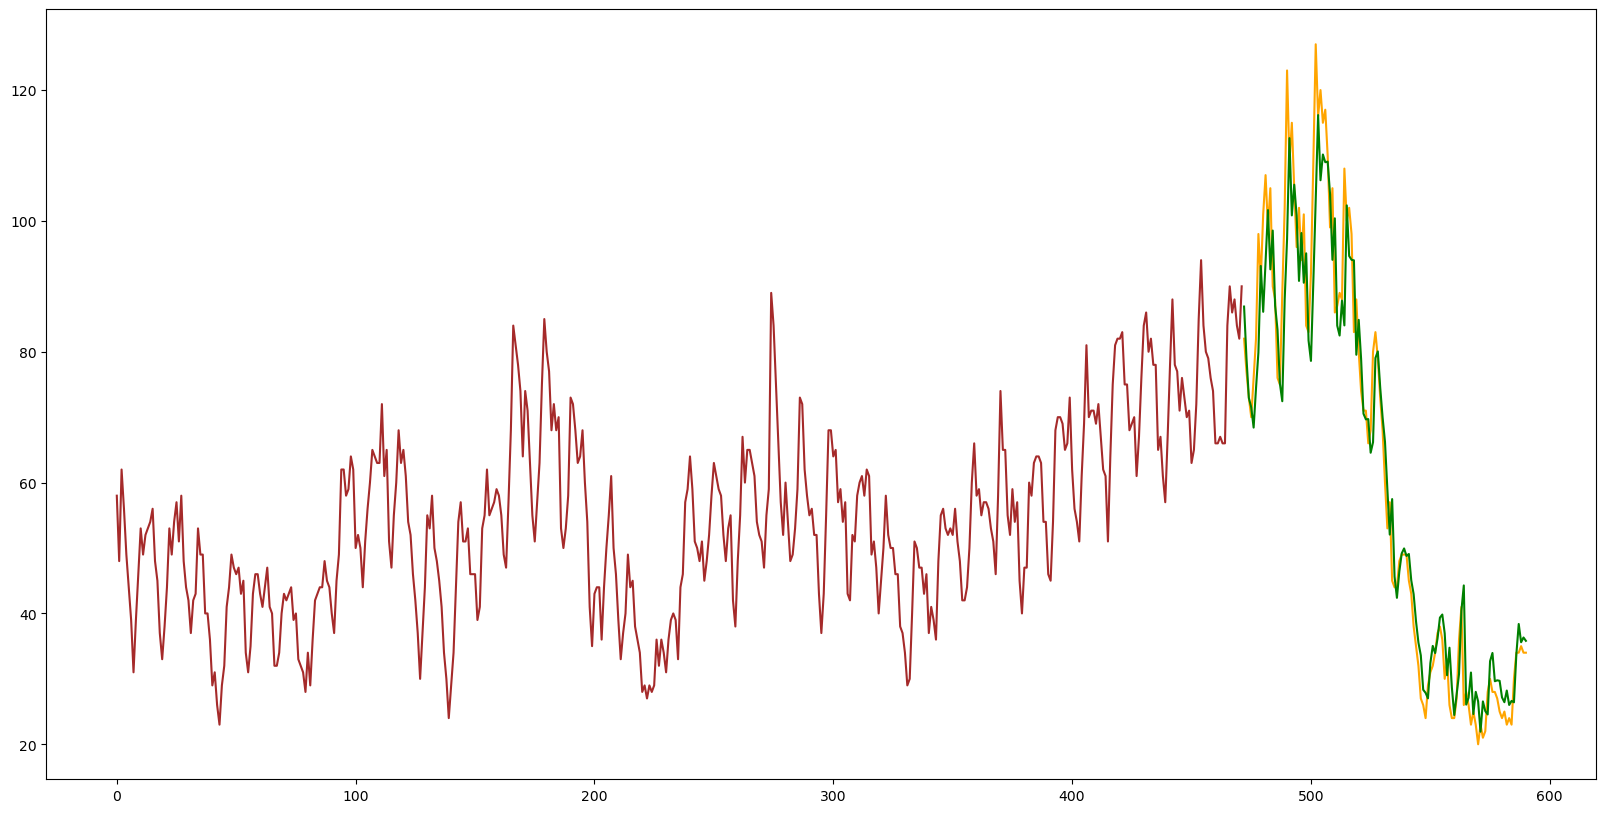

In [31]:
#Plot the values
y_test_original = scaler.inverse_transform(test_data_y)
y_pred_original = scaler.inverse_transform(y_predicted)
ig = plt.subplots(figsize=(20, 10))
plt.plot(np.arange(0, len(train_data_y)), scaler.inverse_transform(train_data_y), color='brown', label='Historical Price')
plt.plot(np.arange(len(train_data_y), len(train_data_y) + len(y_test_original)), y_test_original, color='orange', label='Actual Price')
plt.plot(np.arange(len(train_data_y), len(train_data_y) + len(y_pred_original)), y_pred_original, color='green', label='Predicted Price')


In [142]:
data_set =  df_new.hsold.values
#data_set

In [27]:
#spltiing data for Naive
#x_data
data_set =  df_new
train_size = int(len(data_set)*0.8)
test_size = len(data_set) - train_size
train_data_naive = data_set[:train_size]
test_data_naive =  data_set[train_size:]


In [34]:
y_hat_naive = test_data_naive.copy()
y_hat_naive['naive'] = train_data_naive['hsold'][train_size-1]
y_hat_naive['naive']

mse = mean_squared_error(test_data_naive.hsold.values, y_hat_naive['naive'])

rmse = np.sqrt(mse)
rmse
#test_data_naive.hsold.values
#y_hat_naive['naive']

42.62086126682625

In [33]:
predicted_lstm_y = scaler.inverse_transform(y_predicted)



y_hat_naive = predicted_lstm_y.copy()
y_hat_naive= train_data_naive['hsold'][train_size-1]
y_hat_naive

90

In [145]:
predicted_lstm_y

array([[ 87.24201 ],
       [ 78.7066  ],
       [ 72.703384],
       [ 71.45649 ],
       [ 68.47582 ],
       [ 74.8492  ],
       [ 80.26614 ],
       [ 93.73382 ],
       [ 85.65253 ],
       [ 93.97536 ],
       [101.722305],
       [ 91.92929 ],
       [ 98.52075 ],
       [ 86.16472 ],
       [ 83.113304],
       [ 74.620705],
       [ 72.4695  ],
       [ 88.65953 ],
       [ 97.73501 ],
       [113.324905],
       [ 99.79628 ],
       [105.44704 ],
       [ 99.96211 ],
       [ 90.090195],
       [ 98.15185 ],
       [ 89.986374],
       [ 95.1414  ],
       [ 80.85199 ],
       [ 78.46848 ],
       [ 91.06236 ],
       [103.938446],
       [116.70862 ],
       [105.22857 ],
       [109.91619 ],
       [108.23775 ],
       [108.71146 ],
       [103.31269 ],
       [ 93.1658  ],
       [100.355   ],
       [ 82.96831 ],
       [ 82.391945],
       [ 87.86436 ],
       [ 83.89508 ],
       [103.167534],
       [ 94.06882 ],
       [ 93.834274],
       [ 93.53642 ],
       [ 78.7